In [2]:
# 문제 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 컬럼의 이름을 지정
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
    "num-of-doors", "body-style", "drive-wheels", "engine-location", 
    "wheel-base", "length", "width", "height", "curb-weight", 
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system", 
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", 
    "city-mpg", "highway-mpg", "price"
]
# 데이터 불러오기
df = pd.read_csv("auto_raw.csv", names=column_names)
# 불러온 데이터 출력
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [3]:
# 문제 2

# “?” → 결측값(NaN) 치환
df1 = df.replace('?', np.nan)
# df2에 결측치가 제거 된 값 저장
df2 = df1.dropna()

print(f"전체 행의 결측치 값 개수 : {df1.isnull().any(axis=1).sum()}")
print(f"결측치 제거 후 개수 : {df2.isnull().any(axis=1).sum()}")
print(f"결측치 제거 전 행과열 : {df1.shape}")
print(f"결측치 제거 후 행과열 : {df2.shape}\n")
print("        표 출력")
# 표를 만들기 위해 데이터프레임 사용
table = pd.DataFrame({'결측치' : ['제거전','제거후'],
                      ' 행  ' : [df1.shape[0],df2.shape[0]], 
                      ' 열  ' : [df1.shape[1],df2.shape[1]]})
print(table)
# 결측치 제거 비율 구하기
ratio = ((df1.shape[0] - df2.shape[0]) / (df1.shape[0])) * 100
print(f"결측치 제거 비율 : {ratio:.2f}%")

전체 행의 결측치 값 개수 : 46
결측치 제거 후 개수 : 0
결측치 제거 전 행과열 : (205, 26)
결측치 제거 후 행과열 : (159, 26)

        표 출력
   결측치   행     열  
0  제거전   205    26
1  제거후   159    26
결측치 제거 비율 : 22.44%


In [4]:
# 문제 3

# 데이터를 계산할수 있도록  수치형으로변환
cols_to_convert = ['horsepower', 'curb-weight', 'city-mpg', 'price']
for col in cols_to_convert:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    
print("데이터 타입 확인:\n", df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].dtypes)
    
# desc에 기술통계량 값 저장
desc = df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].describe()

# IQR 계산
Q1 = df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].quantile(0.25)
Q3 = df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].quantile(0.75)
IQR = Q3 - Q1
# 이름 지정
IQR.name = 'IQR'

# 중앙값 계산
median = df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].median()
# 이름 지정
median.name = 'Median'

# 결과 병합
desc_with_iqr = pd.concat([desc, pd.DataFrame(IQR).T])
desc_with_median_iqr = pd.concat([desc_with_iqr, pd.DataFrame(median).T])

print("\n선택된 특성의 기술 통계량 (IQR, 중앙값 포함)\n", desc_with_median_iqr)


데이터 타입 확인:
 horsepower     int64
curb-weight    int64
city-mpg       int64
price          int64
dtype: object

선택된 특성의 기술 통계량 (IQR, 중앙값 포함)
         horsepower  curb-weight    city-mpg         price
count   159.000000   159.000000  159.000000    159.000000
mean     95.836478  2461.138365   26.522013  11445.729560
std      30.718583   481.941321    6.097142   5877.856195
min      48.000000  1488.000000   15.000000   5118.000000
25%      69.000000  2065.500000   23.000000   7372.000000
50%      88.000000  2340.000000   26.000000   9233.000000
75%     114.000000  2809.500000   31.000000  14719.500000
max     200.000000  4066.000000   49.000000  35056.000000
IQR      45.000000   744.000000    8.000000   7347.500000
Median   88.000000  2340.000000   26.000000   9233.000000


C:\Users\HomePc\AppData\Local\Temp\ipykernel_15056\2052216952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = pd.to_numeric(df2[col], errors='coerce')


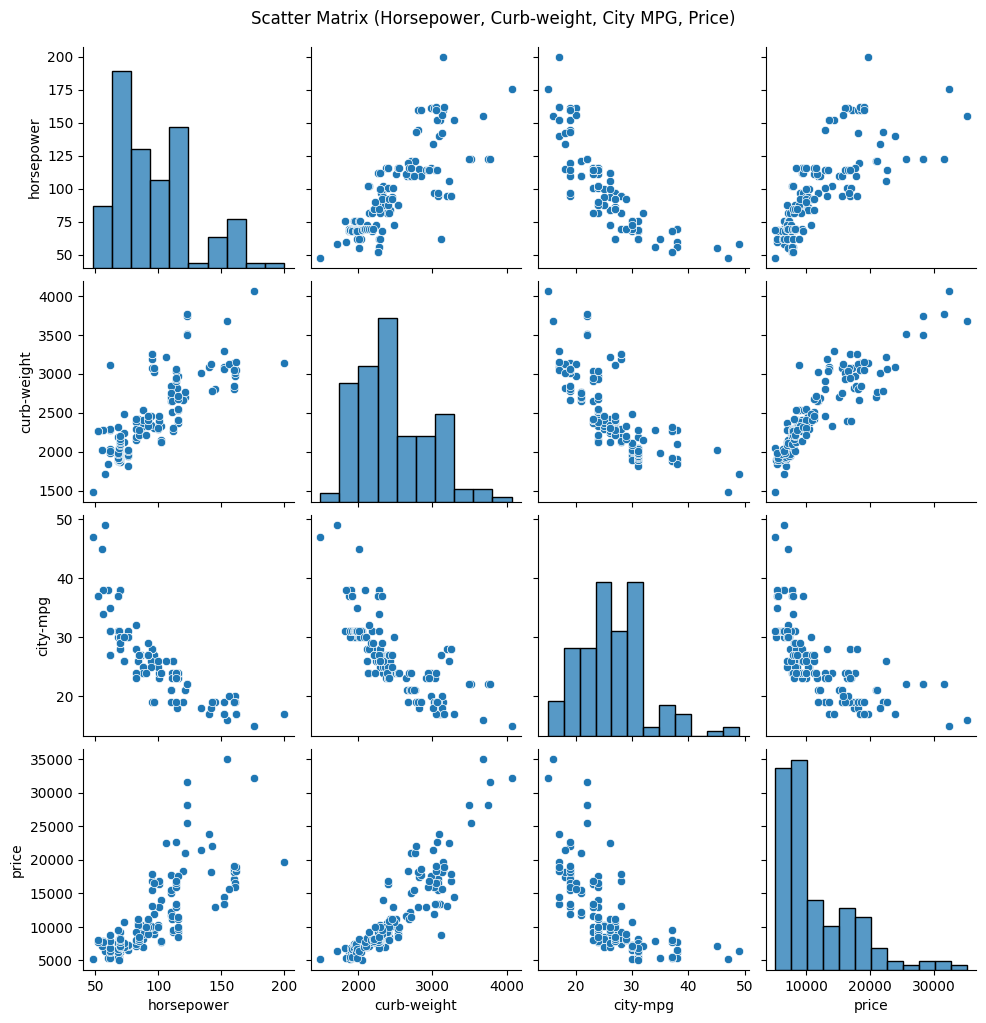

In [5]:
# 문제 4

# 더욱 더 한눈에 보이기 위해 seaborn sns 사용
sns.pairplot(df2[['horsepower', 'curb-weight', 'city-mpg', 'price']], diag_kind='hist')
# 제목
plt.suptitle("Scatter Matrix (Horsepower, Curb-weight, City MPG, Price)", y=1.02)
plt.show()

                     피어슨 상관계수 행렬
             horsepower  curb-weight  city-mpg     price
horsepower     1.000000     0.790095 -0.837214  0.759874
curb-weight    0.790095     1.000000 -0.762155  0.893639
city-mpg      -0.837214    -0.762155  1.000000 -0.692273
price          0.759874     0.893639 -0.692273  1.000000


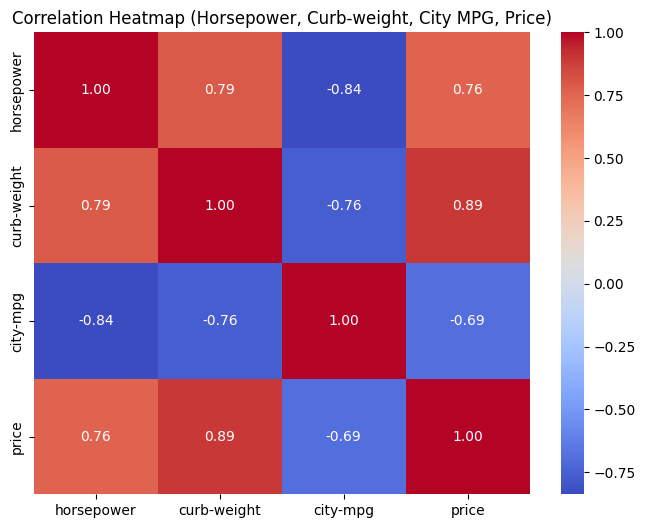

             |r| ≥ 0.7 이상인 쌍
| 변수 1     | 변수 2     | 상관계수 (r) |
| ---------- | ---------- | ------------ |
| horsepower | curb-weight |     0.790095 |
| horsepower | city-mpg   |    -0.837214 |
| horsepower | price      |     0.759874 |
| curb-weight | city-mpg   |    -0.762155 |
| curb-weight | price      |     0.893639 |


In [6]:
# 문제 5

# 상관계수 계산
ps = df2[['horsepower', 'curb-weight', 'city-mpg', 'price']].corr(method='pearson')

print("                     피어슨 상관계수 행렬")
print(ps)

# 히트맵 만들기
plt.figure(figsize=(8, 6))
sns.heatmap(ps, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Horsepower, Curb-weight, City MPG, Price)")
plt.show()

# |r| ≥ 0.7 이상인 쌍을 표로 정리
ab = pd.DataFrame(ps, index=['horsepower', 'curb-weight', 'city-mpg', 'price'])
high_corr_pairs = []
cols = ab.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        var1 = cols[i]
        var2 = cols[j]
        corr = ps.loc[var1, var2]
        if abs(corr) >= 0.7 and not pd.isna(corr):  # NaN 값 제외
            high_corr_pairs.append((var1, var2, corr))
            
print("             |r| ≥ 0.7 이상인 쌍")
print("| 변수 1     | 변수 2     | 상관계수 (r) |")
print("| ---------- | ---------- | ------------ |")
for pair in high_corr_pairs:
    print(f"| {pair[0]:<10} | {pair[1]:<10} | {pair[2]:>12.6f} |")

